### OMNIFY INTERNSHIP TASK (Google Ads Data Set) (self Created and Evaluated)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
df=pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')


In [3]:
df.drop(columns=['Payment ($)','Payment Date'],inplace=True)

### Basic Questions

1) What is the total number of clicks and impressions for each campaign (Group by Campaign and calculate the sum of clicks and impressions)

In [4]:

clicks_impressions = df.groupby('Campaign').agg({'Clicks': 'sum', 'Impressions': 'sum'})
print(clicks_impressions)

Object `campaign` not found.
                                          Clicks  Impressions
Campaign                                                     
EK_Generic_Quad-Tok_Pilates                   10          414
EK_Generic_Quad-Tok_Yoga                      94         3423
EK_Generic_Quad-Tok_Yoga_Singapore             1           34
EK_Generic_Swimming                          114          802
EK_Generic_Swimming_Canada                     6           44
EK_Generic_Swimming_Singapore                 25          116
EK_Generic_Swimming_UK                        26          195
EK_Generic_Tri-Tok_Pilates                     4           19
EK_Generic_Tri-Tok_Reservation                44          782
EK_Generic_Tri-Tok_Reservation_Canada         17          191
EK_Generic_Tri-Tok_Reservation_Singapore       1           45
EK_Generic_Tri-Tok_Reservation_UAE             1           22
EK_Generic_Tri-Tok_Reservation_UK             12          277
EK_Generic_Tri-Tok_Yoga                  

2). Which ad group has the highest number of leads generated?

In [5]:

leads_group = df.groupby('Ad group')['Leads'].sum()

highest_leads_group = leads_group.idxmax()

print("Ad group with the highest number of leads:", highest_leads_group)

Ad group with the highest number of leads: Pool_Reservation_System_Exact


3). What is the average cost per click for each keyword type?


In [6]:
avg_cost_per_click = df.groupby('Keyword type')['Cost ($)'].mean()
print(avg_cost_per_click)

Keyword type
Broad     14.211236
Exact      3.153967
Phrase     6.507241
Name: Cost ($), dtype: float64


4) How many prospects are there for each country?


In [7]:

prospects_count = df.groupby('Country')['Prospects'].count()

print(prospects_count)

Country
USA    418
Name: Prospects, dtype: int64


## intemediate Level 

1). Is there a correlation between the number of clicks and the cost of the campaign?


In [8]:
correlation = df['Clicks'].corr(df['Cost ($)'])
print("Correlation between clicks and cost:", correlation)

Correlation between clicks and cost: 0.8577703613776185


2) Which campaign has the highest conversion rate (leads generated / impressions)?

In [9]:
df['Conversion Rate'] = df['Leads'] / df['Impressions']
highest_conversion_campaign = df.groupby('Campaign')['Conversion Rate'].mean().idxmax()
print("Campaign with the highest conversion rate:", highest_conversion_campaign)

Campaign with the highest conversion rate: EK_Generic_Swimming


### Advanced

### Time Series  (to identify seasonality ,trend)

In [17]:
data=df.copy()

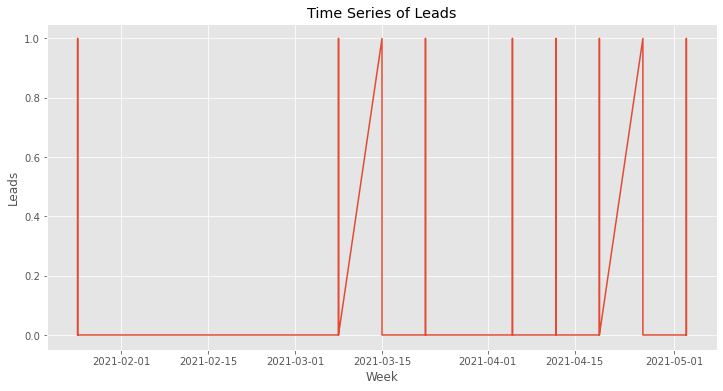

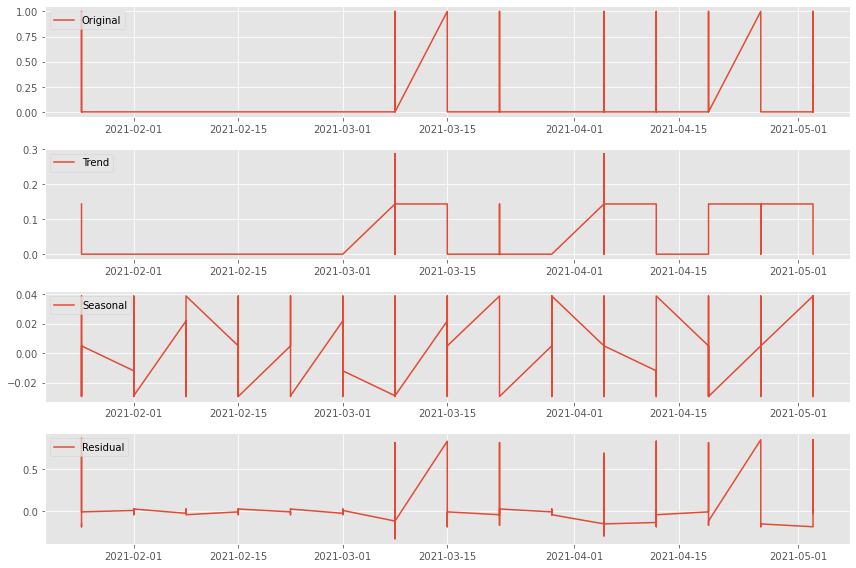

In [18]:

from statsmodels.tsa.seasonal import seasonal_decompose


data['Week'] = pd.to_datetime(data['Week'])

data.set_index('Week', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Leads'])
plt.title('Time Series of Leads')
plt.xlabel('Week')
plt.ylabel('Leads')
plt.show()

decomposition = seasonal_decompose(data['Leads'], model='additive', period=7)  # Assuming weekly data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Leads'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


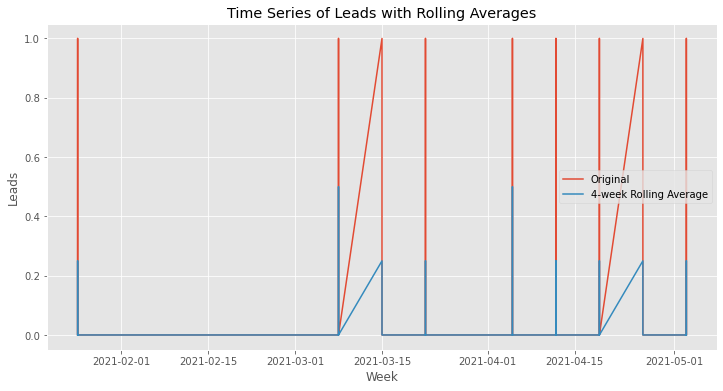

In [19]:
# Compute rolling averages to identify trends
window = 4  # Choose an appropriate window size
rolling_mean = data['Leads'].rolling(window=window).mean()

# Visualize the original data and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(data['Leads'], label='Original')
plt.plot(rolling_mean, label=f'{window}-week Rolling Average')
plt.title('Time Series of Leads with Rolling Averages')
plt.xlabel('Week')
plt.ylabel('Leads')
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


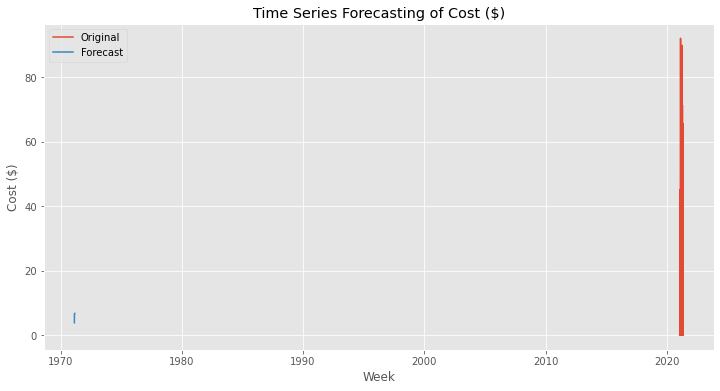

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(data['Cost ($)'], order=(1,1,1))  # You can experiment with different order values
model_fit = model.fit()

# Make predictions
start_index = len(data['Cost ($)'])
end_index = start_index + 10  # Adjust the number of forecasted periods as needed
forecast = model_fit.predict(start=start_index, end=end_index)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Cost ($)'], label='Original')
plt.plot(forecast, label='Forecast')
plt.title('Time Series Forecasting of Cost ($)')
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()


### forecasted Predictions of Cost($)

In [21]:
forecast

418    3.789322
419    5.441091
420    6.161099
421    6.474951
422    6.611759
423    6.671394
424    6.697389
425    6.708720
426    6.713660
427    6.715813
428    6.716751
Name: predicted_mean, dtype: float64

Chi-square test: The chi-square test is used to test the independence of two categorical variables. You can use it to examine the relationship between different categorical variables in the dataset, such as the relationship between 'Campaign' and 'Keyword type

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Campaign'], data['Keyword type'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant association between 'Campaign' and 'Keyword type'.")
else:
    print("There is no statistically significant association between 'Campaign' and 'Keyword type'.")

    

Chi-square test results:
Chi-square statistic: 205.6998000032237
P-value: 5.691550487355011e-29
There is a statistically significant association between 'Campaign' and 'Keyword type'.


 A t-test is used to compare the means of two groups and determine if there is a significant difference between them. You can use a t-test to compare the means of numerical variables between different categories, such as comparing the mean 'Clicks' for different 'Campaign' types 

In [23]:
from scipy.stats import ttest_ind

# Separate the data for each campaign type
campaign_types = data['Campaign'].unique()
campaign_data = {campaign: data[data['Campaign'] == campaign]['Clicks'] for campaign in campaign_types}

# Perform the t-test for each pair of campaign types
for i in range(len(campaign_types)):
    for j in range(i+1, len(campaign_types)):
        campaign1 = campaign_types[i]
        campaign2 = campaign_types[j]
        
        t_stat, p_value = ttest_ind(campaign_data[campaign1], campaign_data[campaign2])
        
        print(f"T-test results for {campaign1} vs {campaign2}:")
        print("T-statistic:", t_stat)
        print("P-value:", p_value)

        # Interpret the results
        alpha = 0.05
        if p_value < alpha:
            print("There is a statistically significant difference in the mean 'Clicks' between", campaign1, "and", campaign2)
        else:
            print("There is no statistically significant difference in the mean 'Clicks' between", campaign1, "and", campaign2)


T-test results for EK_Generic_Swimming vs EK_Generic_Quad-Tok_Yoga:
T-statistic: -1.853599659801559
P-value: 0.06587147024806599
There is no statistically significant difference in the mean 'Clicks' between EK_Generic_Swimming and EK_Generic_Quad-Tok_Yoga
T-test results for EK_Generic_Swimming vs EK_Generic_Swimming_UK:
T-statistic: 0.5155176692393791
P-value: 0.6071242434194914
There is no statistically significant difference in the mean 'Clicks' between EK_Generic_Swimming and EK_Generic_Swimming_UK
T-test results for EK_Generic_Swimming vs EK_Generic_Swimming_Canada:
T-statistic: 1.997199342141964
P-value: 0.04816483852223714
There is a statistically significant difference in the mean 'Clicks' between EK_Generic_Swimming and EK_Generic_Swimming_Canada
T-test results for EK_Generic_Swimming vs EK_Generic_Tri-Tok_Reservation:
T-statistic: 0.6421531813098978
P-value: 0.5218238454949604
There is no statistically significant difference in the mean 'Clicks' between EK_Generic_Swimming and

ANOVA (Analysis of Variance): ANOVA is used to compare the means of three or more groups to determine if there are any significant differences between them. You can use ANOVA to analyze the impact of different 'Campaign' types on the 'Clicks', 'Impressions', or 'Cost ($)

In [24]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Campaign'], data['Keyword type'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant association between 'Campaign' and 'Keyword type'.")
else:
    print("There is no statistically significant association between 'Campaign' and 'Keyword type'.")


Chi-square test results:
Chi-square statistic: 205.6998000032237
P-value: 5.691550487355011e-29
There is a statistically significant association between 'Campaign' and 'Keyword type'.


Correlation analysis: Correlation analysis helps you understand the relationships between numerical variables. You can calculate correlation coefficients (e.g., Pearson's correlation) to measure the strength and direction of the linear relationship between variables like 'Clicks', 'Impressions', and 'Cost ($)

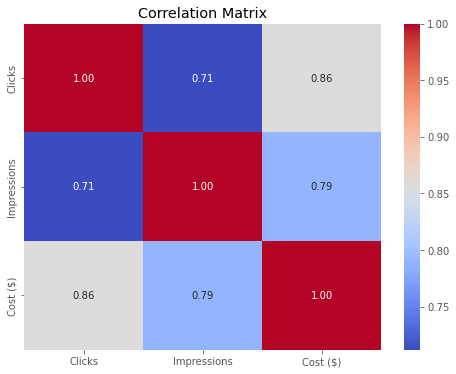

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation analysis
numerical_columns = ['Clicks', 'Impressions', 'Cost ($)']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Clicks and Impressions have a strong positive correlation with a coefficient of approximately 0.71. This suggests that as the number of Impressions increases, the number of Clicks also tends to increase.

Clicks and Cost ($) have a strong positive correlation with a coefficient of approximately 0.86. This indicates that as the Cost ($) of ads increases, the number of Clicks also tends to increase.

Impressions and Cost ($) also have a strong positive correlation with a coefficient of approximately 0.79. This means that as the Cost ($) of ads increases, the number of Impressions also tends to increase.

Overall, we can observe a strong positive relationship between Clicks, Impressions, and Cost ($), indicating that these variables are interrelated and tend to increase or decrease together. This information can be valuable for understanding the performance of ad campaigns and optimizing the ad budget for better results.

Regression analysis: Regression analysis allows you to explore the relationship between a dependent variable and one or more independent variables. You can use regression to understand how 'Clicks' or 'Impressions' are influenced by other factors like 'Cost ($)

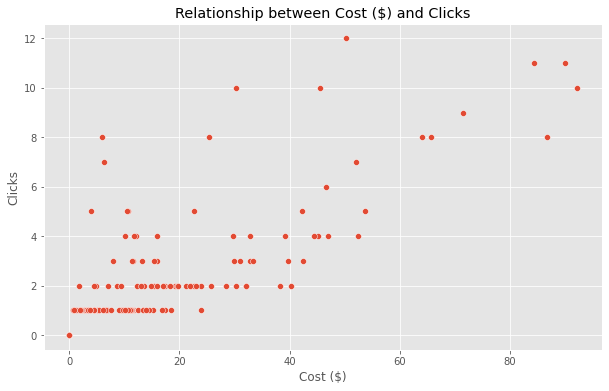

Regression Equation: Clicks = 0.16 + 0.11 * Cost ($)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Visualize the relationship between 'Cost ($)' and 'Clicks'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Cost ($)', y='Clicks')
plt.xlabel('Cost ($)')
plt.ylabel('Clicks')
plt.title('Relationship between Cost ($) and Clicks')
plt.show()

# Perform linear regression
X = data[['Cost ($)']]
y = data['Clicks']

regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients
intercept = regressor.intercept_
slope = regressor.coef_[0]

print(f'Regression Equation: Clicks = {intercept:.2f} + {slope:.2f} * Cost ($)')


Time series analysis: Since you have time-related data in the 'Week' column, you can perform time series analysis to identify trends, seasonality, and other patterns in the data over time. Time series forecasting techniques like ARIMA or SARIMA can help predict future values based on past observations

In [30]:
data=pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

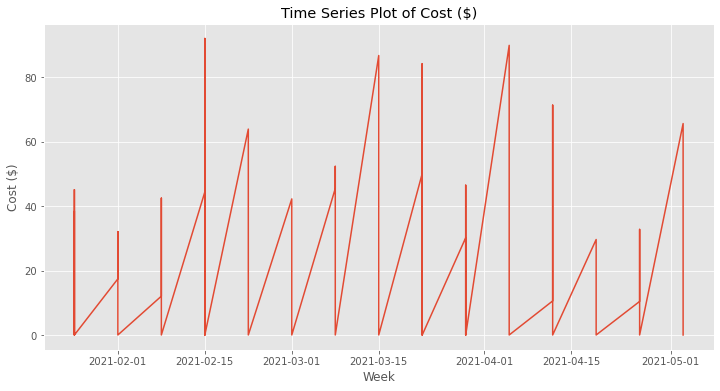

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


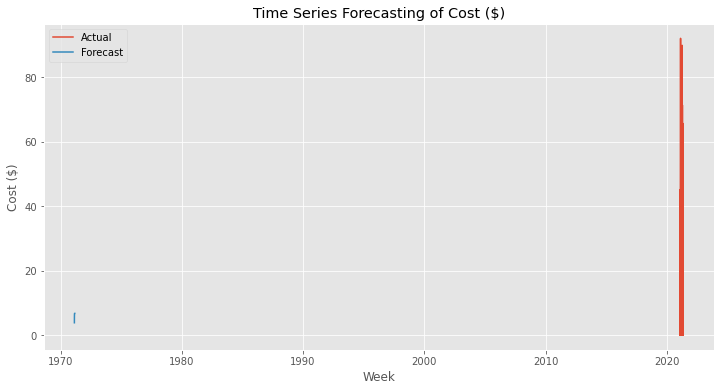

In [31]:

from statsmodels.tsa.arima.model import ARIMA

data['Week'] = pd.to_datetime(data['Week'])
data.set_index('Week', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Cost ($)'])
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.title('Time Series Plot of Cost ($)')
plt.show()

model = ARIMA(data['Cost ($)'], order=(1, 1, 1))
results = model.fit()

forecast_steps = 12  # You can change this to forecast more time steps
forecast = results.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(data['Cost ($)'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.title('Time Series Forecasting of Cost ($)')
plt.legend()
plt.show()


One-way or two-way ANOVA: If you have multiple categorical variables and want to analyze their combined effects on a numerical variable, you can use one-way or two-way ANOVA

### Additional enhancements (if suitable data is provided)

Customer Segmentation: You can perform customer segmentation based on different features such as 'Campaign', 'Keyword type', or 'Country'. This will help identify different customer groups with similar behaviors and characteristics, allowing you to target them more effectively.

Time Series Forecasting: Besides the basic time series analysis, you can explore more advanced time series forecasting models like Prophet or LSTM (Long Short-Term Memory) to make more accurate predictions about future ad performance.

Sentiment Analysis: If there are any text-based columns like 'Search Keyword', you can perform sentiment analysis to understand the sentiment of customers' search queries and its impact on ad performance.

Feature Importance: Use machine learning algorithms like Random Forest or XGBoost to identify the most important features that influence 'Clicks', 'Impressions', or 'Cost ($)'. This will help you understand which factors contribute the most to the success of your ad campaigns.

A/B Testing: Implement A/B testing to compare the performance of different ad campaigns or strategies. This will help you optimize your ad spend by identifying which approach generates better results.

Geospatial Analysis: Utilize geospatial data to analyze the impact of geography on ad performance. You can create visualizations such as heatmaps to identify regions with high or low engagement.

Predictive Analytics: Build predictive models to forecast ad performance based on historical data. This will allow you to proactively adjust your ad strategies to meet your business goals.

Cohort Analysis: Perform cohort analysis to track the behavior of specific customer groups over time. This will help you identify trends and patterns in customer engagement and conversion rates.

Customer Lifetime Value (CLV): Calculate the CLV for different customer segments to understand the long-term value of different ad campaigns.

Customer Churn Analysis: Analyze customer churn rates to identify the factors that lead to customer attrition and take proactive measures to retain customers.

These are just a few examples of what can be done with the dataset and techniques. The key is to keep exploring and experimenting to uncover valuable insights that can drive better decision-making and optimize ad campaign performance.






